In [147]:
import pandas as pd
from pandas import DataFrame, Series
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [148]:
price = pd.read_excel("myAssetPool_final.xlsx", sheet_name = 'Adj_close', index_col=0)
BL_weights = pd.read_excel("BL_weights.xlsx", index_col = 0)

In [149]:
price.head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU
Date,,,,,,,,,,,
2013-12-31,94.472626,79.201256,84.738609,37.710819,39.011066,51.982285,34.600319,67.142357,90.489296,63.431301,11.68
2014-01-02,93.923103,78.510162,83.996521,37.321964,38.665913,51.057976,33.389236,67.201050,90.548790,63.648823,11.88
2014-01-03,93.496719,78.408775,83.978867,37.347317,38.674755,51.244526,33.347179,67.209480,90.582863,63.765339,12.01
2014-01-06,93.250404,77.938866,83.757996,37.296593,38.577400,51.032539,33.027584,67.268166,90.701874,63.920723,12.01
2014-01-07,93.913635,78.547020,84.296883,37.465664,38.816353,51.185162,33.162144,67.352066,90.744354,64.130486,11.95


In [150]:
BL_weights.head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU
2017-01-01,0.001121,-0.016953,0.588160,-0.052155,-0.039819,0.003998,0.070249,0.236667,0.030253,-0.010920,0.141781
2017-02-01,-0.015495,0.019240,0.624220,0.017270,-0.003625,0.020613,0.103538,0.147797,0.049639,-0.080270,0.069452
2017-03-01,-0.051404,0.035856,0.640684,-0.051870,0.156023,0.003998,0.103387,0.131333,-0.145918,0.060991,0.069301
2017-04-01,0.125664,0.160399,0.535513,-0.018596,-0.039656,0.056644,-0.001784,0.111961,-0.003007,0.008467,0.016776
2017-05-01,0.124840,0.159575,0.535633,-0.051873,0.065517,-0.067195,0.050862,0.131331,-0.002888,-0.062726,0.069303


In [151]:
'''weight = DataFrame(columns = BL_weights.columns, index=price['2017-01-03':].index)

for i in range(len(weight)):
    #date = str(weight.index[i])[:10]
    #print(date)
    month = str(weight.index[i])[:7]
    weight.iloc[i,:] = BL_weights[month].values'''

In [174]:
'''datelst = []
for date in ret_data_daily.index:
    d = date.strftime('%Y-%m')
    if d not in datelst:
        datelst.append(d)

print(datelst)'''

"datelst = []\nfor date in ret_data_daily.index:\n    d = date.strftime('%Y-%m')\n    if d not in datelst:\n        datelst.append(d)\n\nprint(datelst)"

In [158]:
'''# 計算初始單位
initial_capital = 1000000

ini_position = {}
for i in range(len(datelst)):
    time = price[datelst[i]].index[0].strftime('%Y-%m-%d')
    
    initial_position = (initial_capital * weight.iloc[i]) / price[time:time].values.reshape(11,)
    ini_position[time] = initial_position'''

In [163]:
initial_capital = 1000000

initial_position = (initial_capital*BL_weights.iloc[0]) / price['2017-01-03':'2017-01-03'].values.reshape(11,)

In [159]:
'''position_df = DataFrame.from_dict(ini_position).T
position_df.head()'''

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU
2017-01-03,9.43494,-166.872,5405.71,-1218.04,-790.547,74.4356,2127.84,3230.66,306.184,-139.038,12704.4
2017-02-01,9.15243,-162.415,5348.18,-1195.86,-780.8,71.3012,2029.64,3230.76,306.276,-139.337,12180.5
2017-03-01,8.71848,-154.45,5088.65,-1160.32,-741.63,69.4756,1957.87,3218.49,305.317,-138.056,11775.9
2017-04-03,8.70971,-154.839,5167.1,-1156.84,-752.026,68.7236,1919.24,3194.97,302.926,-136.286,11746.6
2017-05-01,8.37949,-150.608,5086.82,-1136.6,-740.947,68.0584,1896.97,3187.21,302.096,-135.991,11727.1


In [175]:
index = {}
for time, p in price.loc[datetime.datetime(2017,1,3):].iterrows():
    #print(time, p.values)
    index_value = initial_position * p.values
    index[time] = index_value
    
#print(index)

In [182]:
portfolio_df = DataFrame.from_dict(index).T

portfolio_df.head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU
2017-01-03,1120.707582,-16953.343048,588159.639522,-52154.945874,-39818.511155,3997.645948,70248.841876,236666.697797,30252.660622,-10919.675854,141781.234965
2017-01-04,1131.196282,-17084.878903,592664.453015,-52572.713837,-40063.340491,4067.803546,70889.741524,236842.462779,30261.049202,-10957.503056,142416.457984
2017-01-05,1136.256392,-17112.149324,591500.306730,-52770.611261,-40063.340491,4095.049890,71627.770055,238043.412573,30386.903599,-11084.423609,144576.208977
2017-01-06,1144.168968,-17222.828782,593372.995658,-52704.640806,-40219.143445,4082.108338,71336.456461,237106.073280,30286.217278,-10998.994172,143559.856994
2017-01-09,1145.364892,-17221.223366,591095.307385,-52550.717490,-40093.014946,4097.093189,71219.919659,237691.882609,30336.558102,-11056.353407,144576.208977


In [183]:
etf_value = [portfolio_df[i:i+1].values for i in range(len(portfolio_df))]
portfolio_df['index'] = [sum(value[0]) for value in etf_value]

portfolio_df.head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU,index
2017-01-03,1120.707582,-16953.343048,588159.639522,-52154.945874,-39818.511155,3997.645948,70248.841876,236666.697797,30252.660622,-10919.675854,141781.234965,952380.952381
2017-01-04,1131.196282,-17084.878903,592664.453015,-52572.713837,-40063.340491,4067.803546,70889.741524,236842.462779,30261.049202,-10957.503056,142416.457984,957594.728045
2017-01-05,1136.256392,-17112.149324,591500.306730,-52770.611261,-40063.340491,4095.049890,71627.770055,238043.412573,30386.903599,-11084.423609,144576.208977,960335.383532
2017-01-06,1144.168968,-17222.828782,593372.995658,-52704.640806,-40219.143445,4082.108338,71336.456461,237106.073280,30286.217278,-10998.994172,143559.856994,959742.269773
2017-01-09,1145.364892,-17221.223366,591095.307385,-52550.717490,-40093.014946,4097.093189,71219.919659,237691.882609,30336.558102,-11056.353407,144576.208977,959241.025604


In [167]:
# 計算日報酬
ret_data_daily = portfolio_df.pct_change().dropna()
ret_data_daily.head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU,index
2017-01-04,0.009359,0.007759,0.007659,0.008010,0.006149,0.017550,0.009123,0.000743,0.000277,0.003464,0.004480,0.005474
2017-01-05,0.004473,0.001596,-0.001964,0.003764,0.000000,0.006698,0.010411,0.005071,0.004159,0.011583,0.015165,0.002862
2017-01-06,0.006964,0.006468,0.003166,-0.001250,0.003889,-0.003160,-0.004067,-0.003938,-0.003313,-0.007707,-0.007030,-0.000618
2017-01-09,0.001045,-0.000093,-0.003839,-0.002920,-0.003136,0.003671,-0.001634,0.002471,0.001662,0.005215,0.007080,-0.000522
2017-01-10,0.002088,0.000373,0.000771,0.001046,-0.000370,0.000166,0.005454,-0.000246,-0.000277,-0.000883,0.005272,0.001570


In [37]:
'''datelst = []
for date in ret_data_daily.index:
    d = date.strftime('%Y-%m')
    if d not in datelst:
        datelst.append(d)

ret = {}
for date in datelst:
    ret_monthly = ret_data_daily[date].mean()*len(ret_data_daily[date])
    ret[date] = ret_monthly

ret_data_monthly = DataFrame.from_dict(ret).T'''

In [168]:
vol_ctrl_df = DataFrame(columns = ['return', 'vol'], index = ret_data_daily.index)

# 計算每月標準差
for i in range(len(ret_data_daily)):
    vol_ctrl_df.iat[i,0] = ret_data_daily.iloc[i,11]
    #print(vol_ctrl_df.iloc[i,0])
    #print(vol_ctrl_df.iloc[i-20:i, 0])
    vol = vol_ctrl_df.iloc[i-20:i, 0].std()*np.sqrt(252/20)
    vol_ctrl_df.iat[i,1] = vol

vol_ctrl_df.tail()

,return,vol
2019-04-24,-0.00067059,0.0107151
2019-04-25,-0.0010275,0.0105362
2019-04-26,0.00473786,0.00988309
2019-04-29,-0.000253925,0.0102873
2019-04-30,0.000791158,0.00996869


In [169]:
default = np.full((583,), np.nan)
vol_ctrl_df['Vol_Warning'] = default

vol_ctrl_df.head()

,return,vol,Vol_Warning
2017-01-04,0.00547446,NaN,NaN
2017-01-05,0.00286202,NaN,NaN
2017-01-06,-0.000617611,NaN,NaN
2017-01-09,-0.00052227,NaN,NaN
2017-01-10,0.00156953,NaN,NaN


In [171]:
target_vol = 0.05

for index, vol in vol_ctrl_df.iterrows():
    if vol[1] >= target_vol:
        vol_ctrl_df.loc[index:index,'Vol_Warning'] = 1
    else:
        vol_ctrl_df.loc[index:index,'Vol_Warning'] = 0 

In [172]:
vol_ctrl_df.head()

,return,vol,Vol_Warning
2017-01-04,0.00547446,NaN,0.0
2017-01-05,0.00286202,NaN,0.0
2017-01-06,-0.000617611,NaN,0.0
2017-01-09,-0.00052227,NaN,0.0
2017-01-10,0.00156953,NaN,0.0


In [173]:
vol_ctrl_df['Vol_Warning'].sum()

0.0

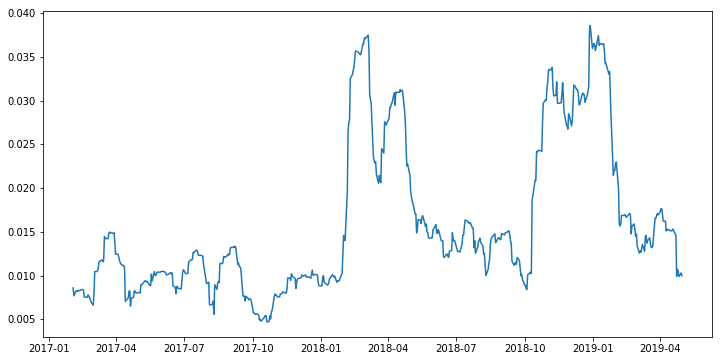

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(vol_ctrl_df.index, vol_ctrl_df['vol'])

plt.show()